**MODEL LAPISAN BAWAH TANAH SEDERHANA**

Dibuat model lapisan sederhana yang memiliki parameter model x0, x1, z0, z1, dan nilai densitas kg/m^3.

In [126]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
os.chdir(r"C:\Users\userl\Documents\Github\PPIG\PengantarPIG\Penerapan")

In [127]:
#membuat titik pengukuran sintetis pada bidang x dengan interval 10 meter
x = np.arange(0,1001,10)
#import parameter model dan mengelompokkan tiap parameter dari beberapa model
Model = pd.read_csv("Parameter Model Sintetik 2D.csv")
MS = np.array(Model)
ms_t = np.transpose(MS)
x0 = np.array(ms_t[1])
z0 = np.array(ms_t[2])
x1 = np.array(ms_t[3])
z1 = np.array(ms_t[4])
Rho = np.array(ms_t[5])
#menampilkan parameter model
Model

,Label,X₀ (m),Z₀(m),X₁ (m),Z₁(m),ρ(Kg/m³)
0,1,0.1,600.0,500,900,9000
1,2,0.1,300.0,500,600,3000
2,2,500.0,600.0,1000,900,3000
3,3,0.1,0.1,500,300,4000
4,3,500.0,300.0,1000,600,4000
5,4,500.0,0.1,1000,300,2000


__Forward Modeling__

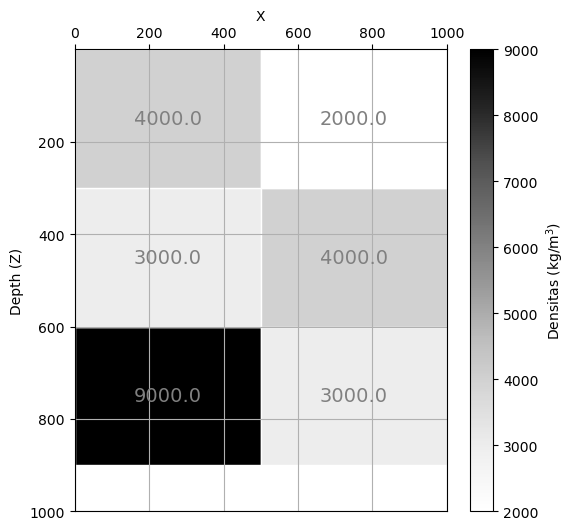

In [128]:
#normalisasi densitas ke [0,1] untuk peta warna
norm = colors.Normalize(vmin=min(Rho), vmax=max(Rho))
cmap = cm.Greys

#plotting
fig, ax2 = plt.subplots(figsize=(6, 6))
for xi0, xi1, zi0, zi1, val in zip(x0, x1, z0, z1, Rho):
    #warna dari nilai densitas
    color = cmap(norm(val))
    #gambar balok
    ax2.fill([xi0, xi1, xi1, xi0], [zi0, zi0, zi1, zi1], facecolor=color, edgecolor='white')
    #teks nilai densitas
    ax2.text((xi0+xi1)/2, (zi0+zi1)/2, str(val), color='grey', ha='center', va='center', fontsize=14)

#set sumbu
ax2.set_facecolor('white')
ax2.set_xlim(0, 1000)
ax2.set_ylim(1000, min(z0))  # depth ke bawah

#posisi sumbu X 
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

#atur label di sumbu x dan y
ax2.set_xlabel('X')
ax2.set_ylabel('Depth (Z)')

#aktifkan penggunaan grid
plt.grid(True)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, orientation='vertical', label=r'Densitas ($\mathrm{kg/m}^3$)')

plt.show()


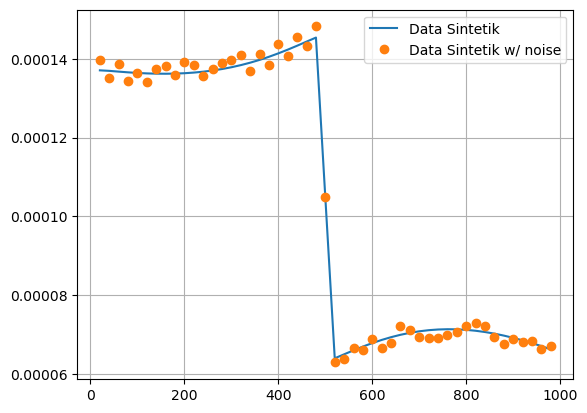

In [129]:
#Fungsi Fwd Modeling
G = 6.67e-11                    #Define G (m^3 kg^-1 s^-2)
x = np.arange(20, 981, 20)

def gz_balok_2D(x, x0, x1, z0, z1, Rho):
    G = 6.67430e-11  # konstanta gravitasi (m^3 kg^-1 s^-2)
    
    term1 = np.arctan((x - x0) / z0)
    term2 = np.arctan((x - x1) / z0)
    term3 = np.arctan((x - x0) / z1)
    term4 = np.arctan((x - x1) / z1)

    gz = 2 * G * Rho * (term1 - term2 - term3 + term4)  # dalam m/s^2
    gz_mgal = gz * 1e2
    return gz_mgal

#memberlakukan fungsi respon gravitasi model balok homogen
gz_1 = gz_balok_2D(x, x0[0], x1[0], z0[0], z1[0], Rho[0])
gz_2 = gz_balok_2D(x, x0[1], x1[1], z0[1], z1[1], Rho[1])
gz_3 = gz_balok_2D(x, x0[2], x1[2], z0[2], z1[2], Rho[2])
gz_4 = gz_balok_2D(x, x0[3], x1[3], z0[3], z1[3], Rho[3])
gz_5 = gz_balok_2D(x, x0[4], x1[4], z0[4], z1[4], Rho[4])
gz_6 = gz_balok_2D(x, x0[5], x1[5], z0[5], z1[5], Rho[5])
#total respon gravitasi dari seluruh model
gz_total = gz_1 + gz_2 + gz_3 + gz_4 +gz_5 + gz_6

#generate noise
rng = np.random.default_rng(seed=10)
noise = rng.uniform(-0.3e-5,0.3e-5, len(gz_total))
gz_noise = gz_total + noise

#plot data dengan noise dan tanpa noise
plt.plot(x, gz_total, label = "Data Sintetik")
plt.plot(x, gz_noise, "o", label = "Data Sintetik w/ noise")
plt.legend()
plt.grid(True)
plt.show()

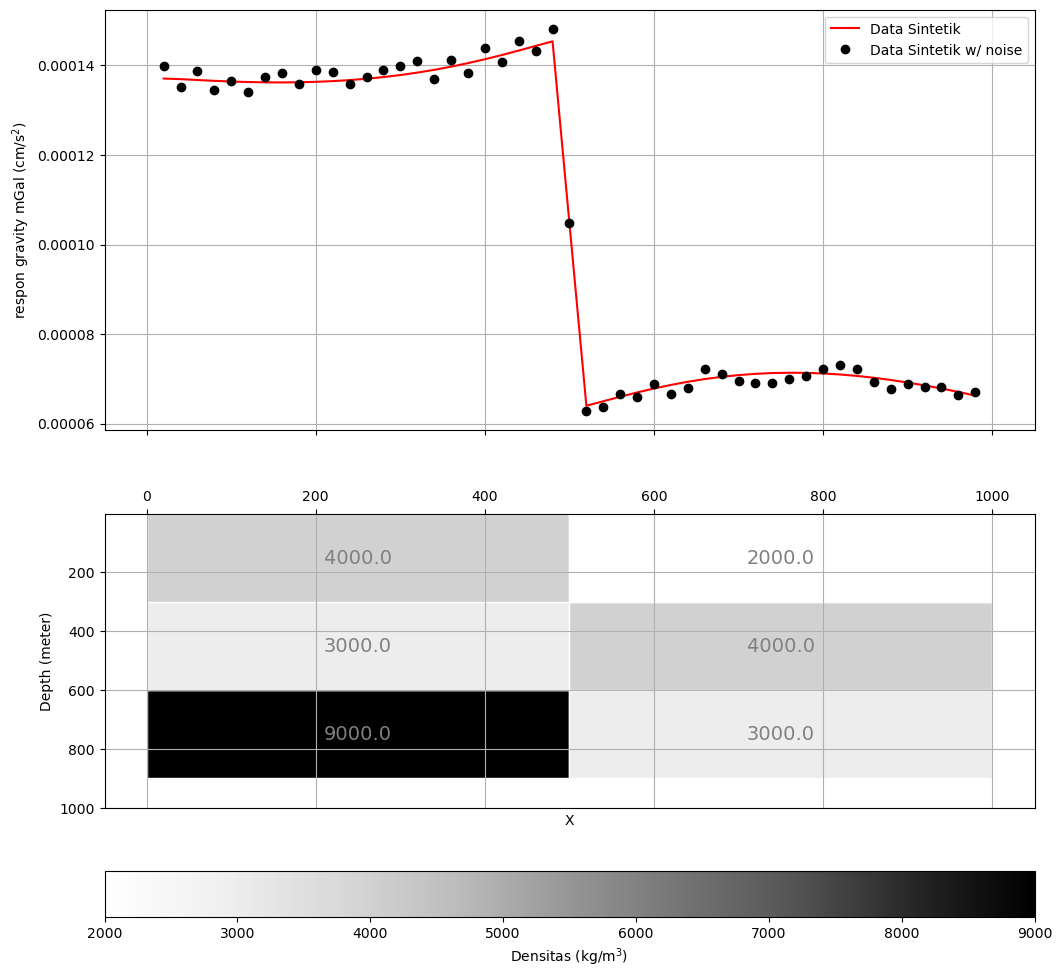

In [ ]:
#plot 2 object atas bawah
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (12, 12))

#Plot Data
ax1.plot(x, gz_total, "r-", label = "Data Sintetik")
ax1.plot(x, gz_noise, "ko", label = "Data Sintetik w/ noise")
ax1.legend()
ax1.set_ylabel(r            'respon gravity mGal ($\mathrm{cm/s}^2$)')
ax1.grid(True)

#Plot Model
ax2.set_facecolor('white')
ax2.set_ylim(1000, min(z0))
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('X')
ax2.set_ylabel('Depth (meter)')
ax2.grid(True)
for xi0, xi1, zi0, zi1, val in zip(x0, x1, z0, z1, Rho):
    #warna dari nilai densitas
    color = cmap(norm(val))
    #gambar balok
    ax2.fill([xi0, xi1, xi1, xi0], [zi0, zi0, zi1, zi1], facecolor=color, edgecolor='white')
    #teks nilai densitas
    ax2.text((xi0+xi1)/2, (zi0+zi1)/2, str(val), color='grey', ha='center', va='center', fontsize=14)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, orientation='horizontal', label=r'Densitas ($\mathrm{kg/m}^3$)')

__Invers Modeling__

**d=G.m**


(49,)